In [28]:
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [29]:
prefix = "../songs/"
cfm_file = prefix + "cfm.wav"
fancy_file  = prefix + "fancy.wav"
pw_file = prefix + "pw.wav"

cfm, sr = librosa.load(cfm_file, duration=50, offset=5)
fancy, _ = librosa.load(fancy_file, duration=50, offset=5)
pw, _ = librosa.load(pw_file, duration=50, offset=5)

In [30]:
FRAME_SIZE = 2048
HOP_SIZE = 512
S_cfm = librosa.stft(cfm, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_fancy = librosa.stft(fancy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_pw = librosa.stft(pw, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)


In [31]:
# Calculate Band Energy Ratio

def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [32]:
split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
split_frequency_bin

185

In [33]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

In [34]:
ber_cfm = band_energy_ratio(S_cfm, 2000, sr)
ber_fancy = band_energy_ratio(S_fancy, 2000, sr)
ber_pw = band_energy_ratio(S_pw, 2000, sr)

In [35]:
len(ber_cfm)

2154

In [36]:
# Visualize Band Energy Ratio

frames = range(len(ber_cfm))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

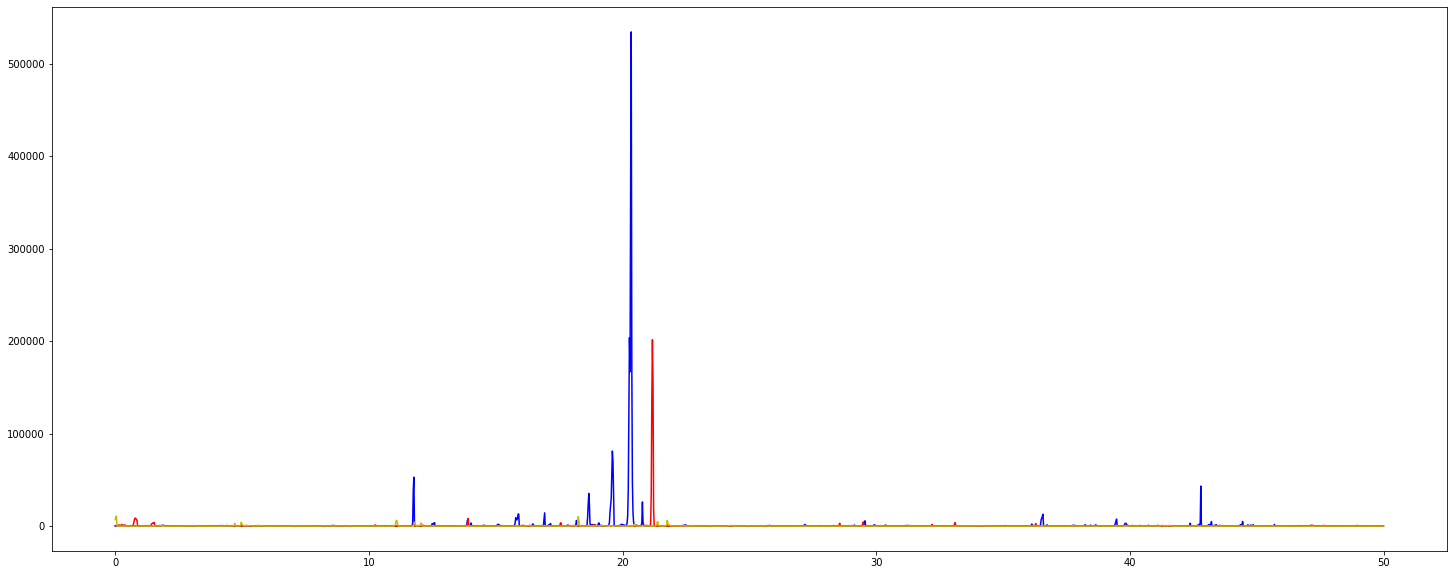

In [37]:
plt.figure(figsize=(25, 10))

plt.plot(t, ber_cfm, color="b")
plt.plot(t, ber_fancy, color="r")
plt.plot(t, ber_pw, color="y")
#plt.ylim((0, 20000))
plt.show()